## Introduction

This is a mini-project aimed at creating a convolutional neural network with Tensorflow and Keras to classify Cats and Dogs images. You may find the dataset here ([Kaggle Cats and Dogs Dataset](https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765)).

The network was implemented in my local machine without GPU, so I rescaled the image size and passed them to the network in grayscale, but the result was still pretty good!

Tensorflow with Keras is easy to be implemented, below codes can be written in few hours. I hope you will find the comments below useful. Let's get started.

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
%matplotlib inline

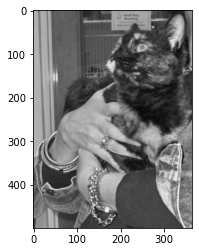

In [2]:
datadir = '/Users/BillyLam/Desktop/ML_project/kagglecatsanddogs/PetImages'
categories = ['Cat','Dog']

# plot an image as an example
for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) # color is not a distinct feature between cats and dogs
        plt.imshow(img, cmap='gray')
        break
    break

In [3]:
# array representation and shape
print(img)
print(img.shape)

[[174 175 177 ... 134 133 132]
 [175 176 178 ... 135 134 132]
 [177 178 179 ... 137 136 134]
 ...
 [ 56  55  58 ... 168 165 174]
 [ 57  56  58 ... 157 150 153]
 [ 58  56  58 ... 156 143 139]]
(500, 365)


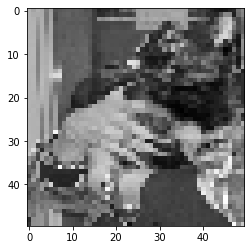

In [4]:
# resize image for handling easily without GPU
img_size = 50
new_array = cv2.resize(img, (img_size,img_size))
plt.imshow(new_array, cmap='gray')

In [5]:
X = []
y = []

def create_training_set():
    for category in categories:
        path = os.path.join(datadir, category)
        label = categories.index(category)
        for img in os.listdir(path):
            try: # avoid warning for broken images
                img = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img, (img_size,img_size))
                X.append(new_array)
                y.append(label)
            except Exception as e:
                pass

create_training_set()

In [6]:
# vector representation and label of an image
print(X[0])
print('\n','Number of images: ', len(y))

[[177 164 175 ...  49 118 138]
 [177 170 170 ...  42 111 133]
 [178 175 161 ...  99  79 114]
 ...
 [133 113 146 ... 127 127 149]
 [ 53 142 147 ... 150 109 119]
 [ 65 145 147 ... 242 143 198]]

 Number of images:  24946


In [7]:
# convert list to array
X = np.array(X).reshape(-1, img_size, img_size, 1)
y = np.array(y)

In [8]:
# scaling can be simply done by dividing by 255 for grayscale images
X = X/255

In [9]:
# save the data as backup
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Creation

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

In [12]:
model = Sequential()

model.add(Conv2D(64, (4,4), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (4,4)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
net_history = model.fit(X_train, y_train, validation_data=(X_test,y_test),
                        batch_size=64, epochs=10)

Epoch 1/10
312/312 [==============================] - 117s 374ms/step - loss: 0.6595 - accuracy: 0.5982 - val_loss: 0.6116 - val_accuracy: 0.6752
Epoch 2/10
312/312 [==============================] - 90s 290ms/step - loss: 0.5783 - accuracy: 0.6986 - val_loss: 0.5541 - val_accuracy: 0.7186
Epoch 3/10
312/312 [==============================] - 100s 320ms/step - loss: 0.5177 - accuracy: 0.7487 - val_loss: 0.4985 - val_accuracy: 0.7535
Epoch 4/10
312/312 [==============================] - 157s 505ms/step - loss: 0.4770 - accuracy: 0.7717 - val_loss: 0.4707 - val_accuracy: 0.7699
Epoch 5/10
312/312 [==============================] - 164s 525ms/step - loss: 0.4386 - accuracy: 0.7976 - val_loss: 0.4849 - val_accuracy: 0.7719
Epoch 6/10
312/312 [==============================] - 130s 416ms/step - loss: 0.4068 - accuracy: 0.8105 - val_loss: 0.4496 - val_accuracy: 0.7854
Epoch 7/10
312/312 [==============================] - 125s 399ms/step - loss: 0.3747 - accuracy: 0.8318 - val_loss: 0.4458 - 

## Model Evaluation

In [14]:
loss_df = pd.DataFrame(net_history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.659500,0.598166,0.611563,0.675150
1,0.578324,0.698587,0.554109,0.718637
2,0.517701,0.748747,0.498531,0.753507
3,0.476955,0.771698,0.470667,0.769940
4,0.438584,0.797555,0.484909,0.771944
5,0.406829,0.810483,0.449625,0.785371
6,0.374686,0.831830,0.445782,0.792986
7,0.329725,0.855582,0.456034,0.795792
8,0.296784,0.873873,0.447816,0.804409
9,0.262790,0.887954,0.450952,0.810020


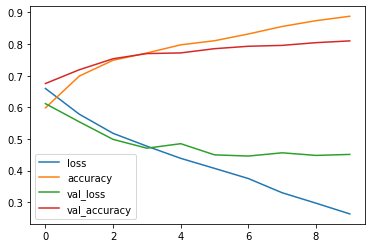

In [15]:
# seems like the model can still be improved by more epochs
loss_df.plot()

In [16]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [18]:
# https://en.wikipedia.org/wiki/Precision_and_recall

from sklearn.metrics import classification_report,confusion_matrix
print('classification Report:', '\n', classification_report(y_test,predictions))
print('\n', 'Confusion Matrix:', '\n', confusion_matrix(y_test,predictions))

classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      2547
           1       0.81      0.80      0.80      2443

    accuracy                           0.81      4990
   macro avg       0.81      0.81      0.81      4990
weighted avg       0.81      0.81      0.81      4990


 Confusion Matrix: 
 [[2088  459]
 [ 489 1954]]


The result is indeed pretty good with such a simple model predicting the scaled image. For machines with GPUs, the model could be improved by not scaling the images too much, using RGB, and trying different models with for loop.

It's the end of this mini-project, demonstrating how to use Tensorflow with Keras to implement CNN as an image classifer. I hope you enjoy it!

## Thank you!